# MONTE CARLO DROPOUT
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais proposto por Yarin Gal. O Dataset escolhido foi O 
Concrete Compressive Strength Data Set (http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Concrete compressive strength(MPa, megapascals" e todas as demais foram consideradas como variáveis preditoras. 

#Descrição do método proposto por Yarin Gal: 

Em 2015, Yarin Gal mostrou que é possível obter incerteza a partir de redes neurais quase que gratuitamente, se olhássemos técnicas de regularização estocásticas, como Dropout, sob uma perspectiva Bayesiana. Dropout (Srivastava et al, 2014) é uma técnica utilizada na maioria das redes neurais modernas para prevenir sobre-ajustamento. Durante o treinamento, Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural. No momento de fazer previsões, todos os neurônios são mantidos e a rede neural atua como uma grande mistura de sub-redes menores.
Durante o treinamento do modelo, nada muda; mas, durante o teste mantemos a probabilidade de Dropout fixada durante o treino e realizamos T  forward-pass pela rede, coletando assim T  previsões y para cada amostra. Assim para cada ponto teremos uma previsão para a média e uma previsão para a variância, que será nossa medida de incerteza.
 

In [1]:
# Importando as bibliotecas necessárias para importação dos datasets

In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")


In [121]:
# importando os dados  

In [122]:
df=pd.read_csv('dados_linear.csv')

In [123]:
df

,x1,x2,x3,x4,y
0,0.1,0.6,1,2,3.7
1,0.9,5.4,9,18,33.3
2,0.3,1.8,3,6,11.1
3,0.6,3.6,6,12,22.2
4,1.0,6.0,10,20,37.0
...,...,...,...,...,...
1994,1.0,6.0,10,20,37.0
1995,0.6,3.6,6,12,22.2
1996,0.7,4.2,7,14,25.9
1997,0.1,0.6,1,2,3.7


In [124]:
y=df['y']

In [192]:
y=pd.DataFrame(y)

In [193]:
y

,y
0,3.7
1,33.3
2,11.1
3,22.2
4,37.0
...,...
1994,37.0
1995,22.2
1996,25.9
1997,3.7


In [125]:
X=df.drop('y' ,axis=1)

In [126]:
X

,x1,x2,x3,x4
0,0.1,0.6,1,2
1,0.9,5.4,9,18
2,0.3,1.8,3,6
3,0.6,3.6,6,12
4,1.0,6.0,10,20
...,...,...,...,...
1994,1.0,6.0,10,20
1995,0.6,3.6,6,12
1996,0.7,4.2,7,14
1997,0.1,0.6,1,2


In [187]:
X_test=X.iloc[0:600,:]

In [188]:
X_train=X.iloc[601:1998,:]

In [189]:
X_train

,x1,x2,x3,x4
601,0.8,4.8,8,16
602,0.2,1.2,2,4
603,0.1,0.6,1,2
604,0.3,1.8,3,6
605,0.4,2.4,4,8
...,...,...,...,...
1993,0.7,4.2,7,14
1994,1.0,6.0,10,20
1995,0.6,3.6,6,12
1996,0.7,4.2,7,14


In [194]:
y_test=y.iloc[0:600,:]

In [195]:
y_test

,y
0,3.7
1,33.3
2,11.1
3,22.2
4,37.0
...,...
595,3.7
596,18.5
597,37.0
598,33.3


In [196]:
y_train=y.iloc[601:1998,:]

In [197]:
y_train

,y
601,29.6
602,7.4
603,3.7
604,11.1
605,14.8
...,...
1993,25.9
1994,37.0
1995,22.2
1996,25.9


In [ ]:
#importando bibliotecas para construção da rede neural 

In [198]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
#construimos a rede neural

In [199]:
n_input = 4  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.005 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.005, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_27 (Dropout)        (None, 4)                 0         
                                                                 
 dense_27 (Dense)            (None, 100)               500       
                                                                 
 dropout_28 (Dropout)        (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dropout_29 (Dropout)        (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,701
Trainable params: 10,701
Non-trai

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [117]:
#treinamos nossa rede por 15000 interações . Cada mini-lote terá 1/5das amostras e assim treinaremos por
# 3000 épocas ou 15000 iterações.

In [200]:
epochs = 3000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 10,
            epochs=epochs,
            verbose=0)

In [ ]:
#Avaliamos a performance do modelo )

In [201]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


44/44 [==============================] - 0s 568us/step


In [202]:
y_hat_test = model.predict(X_test)


19/19 [==============================] - 0s 824us/step


In [203]:
# métricas do treino

In [204]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [205]:
MAE_T,R2_T,RMSE_T

(0.36633223251692265, 0.9984739601002697, 0.16823152454612456)

In [206]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [207]:
MAE_t,R2_t,RMSE_t

(0.34637216726938846, 0.9986856579771939, 0.1570968726629568)

In [208]:
# elaboração do gráfico ordenando os dados em ordem e plotando os valores de calcio real e predito no conjunto de teste 

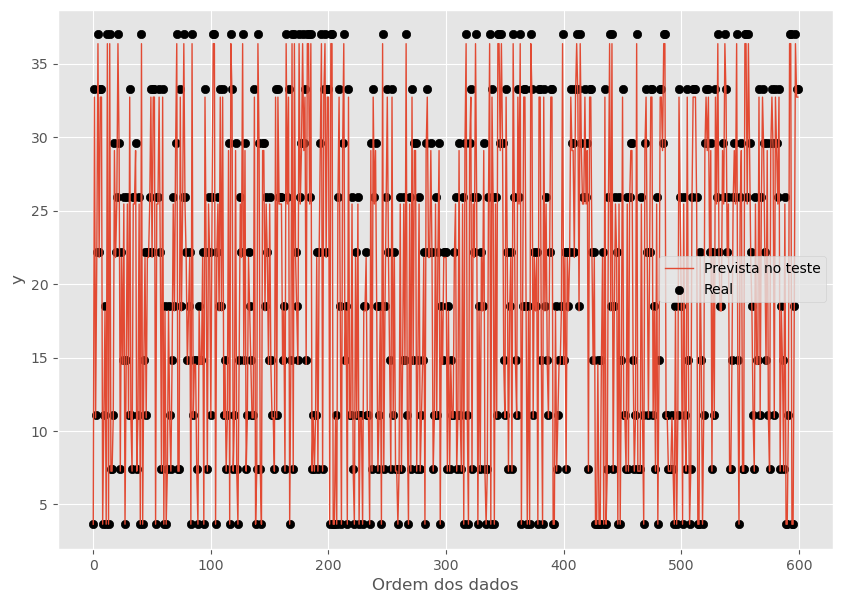

In [209]:
# avaliação conjunto de teste
n = 600
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("y")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

In [210]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [211]:
y_hat_mc.shape

(600, 1000)

In [212]:
# para cada amostra, foram calculados 1000 resultados com base no Dropout . Vamos ver o dataframe :

In [213]:
yhat=pd.DataFrame(y_hat_mc)

In [214]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3.701416,3.700282,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.698705,3.701416,...,3.701416,3.693035,3.700981,3.701416,3.695715,3.619183,3.701020,3.697407,3.563380,3.701416
1,32.626320,33.098637,33.206196,33.162579,32.953518,30.925180,33.206196,33.206196,33.206196,33.287777,...,33.206196,33.206196,33.206196,33.206196,33.206196,33.206196,33.206196,33.077938,33.206196,33.206196
2,11.025967,11.052550,11.027904,11.052550,11.052550,11.052550,11.052550,11.052550,11.052550,9.907964,...,11.033326,11.052550,11.052550,11.052550,11.052550,11.052550,11.052550,10.785127,11.052550,10.896863
3,22.081097,21.656794,22.129206,22.050261,22.129206,22.129206,22.129206,22.129206,22.129206,22.129206,...,22.069088,22.129206,22.225368,21.020893,22.124670,22.129206,22.129206,22.119865,22.129206,22.129206
4,36.898525,36.033497,36.898525,36.898525,36.797913,36.898525,36.898525,36.898525,36.898525,36.898525,...,36.788708,36.898525,36.898525,36.898525,36.898525,36.898525,36.898525,36.755871,37.170776,36.898525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.620543,3.701416,...,3.621851,3.701416,3.701416,3.695300,3.701416,3.628558,3.701416,3.701416,3.701416,3.701416
596,17.913700,18.436876,18.014334,18.436876,18.436876,18.389669,18.436876,18.436876,18.436876,18.436876,...,18.436876,18.436876,17.610697,18.436876,18.436876,18.412550,18.436876,18.436876,18.392962,18.013508
597,35.930485,36.898525,36.898525,36.906273,36.898525,36.006397,36.898525,36.925972,36.963394,36.898525,...,36.898525,36.898525,36.898525,36.898525,36.898525,36.783543,36.755871,36.898525,36.898525,36.057728
598,33.206196,33.272499,33.206196,33.082596,33.148796,33.138821,33.206196,33.068516,33.206196,33.206196,...,33.206196,32.376446,33.234547,33.206196,33.272499,33.206196,33.087009,33.206196,33.206196,32.320114


In [215]:
#vamos calcular a média dos 1000 resultados para cada amostra de teste

In [216]:
yhat['mean']=yhat.apply(np.mean,axis=1)

In [217]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,mean
0,3.701416,3.700282,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.698705,3.701416,...,3.693035,3.700981,3.701416,3.695715,3.619183,3.701020,3.697407,3.563380,3.701416,3.686563
1,32.626320,33.098637,33.206196,33.162579,32.953518,30.925180,33.206196,33.206196,33.206196,33.287777,...,33.206196,33.206196,33.206196,33.206196,33.206196,33.206196,33.077938,33.206196,33.206196,32.999615
2,11.025967,11.052550,11.027904,11.052550,11.052550,11.052550,11.052550,11.052550,11.052550,9.907964,...,11.052550,11.052550,11.052550,11.052550,11.052550,11.052550,10.785127,11.052550,10.896863,10.999114
3,22.081097,21.656794,22.129206,22.050261,22.129206,22.129206,22.129206,22.129206,22.129206,22.129206,...,22.129206,22.225368,21.020893,22.124670,22.129206,22.129206,22.119865,22.129206,22.129206,22.015518
4,36.898525,36.033497,36.898525,36.898525,36.797913,36.898525,36.898525,36.898525,36.898525,36.898525,...,36.898525,36.898525,36.898525,36.898525,36.898525,36.898525,36.755871,37.170776,36.898525,36.697647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.620543,3.701416,...,3.701416,3.701416,3.695300,3.701416,3.628558,3.701416,3.701416,3.701416,3.701416,3.688544
596,17.913700,18.436876,18.014334,18.436876,18.436876,18.389669,18.436876,18.436876,18.436876,18.436876,...,18.436876,17.610697,18.436876,18.436876,18.412550,18.436876,18.436876,18.392962,18.013508,18.346491
597,35.930485,36.898525,36.898525,36.906273,36.898525,36.006397,36.898525,36.925972,36.963394,36.898525,...,36.898525,36.898525,36.898525,36.898525,36.783543,36.755871,36.898525,36.898525,36.057728,36.691891
598,33.206196,33.272499,33.206196,33.082596,33.148796,33.138821,33.206196,33.068516,33.206196,33.206196,...,32.376446,33.234547,33.206196,33.272499,33.206196,33.087009,33.206196,33.206196,32.320114,33.025818


In [218]:
#separamos novamente os 1000 resultados retitrando a coluna média 

In [219]:
yhatd=yhat.iloc[:,0:1000]

In [220]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3.701416,3.700282,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.698705,3.701416,...,3.701416,3.693035,3.700981,3.701416,3.695715,3.619183,3.701020,3.697407,3.563380,3.701416
1,32.626320,33.098637,33.206196,33.162579,32.953518,30.925180,33.206196,33.206196,33.206196,33.287777,...,33.206196,33.206196,33.206196,33.206196,33.206196,33.206196,33.206196,33.077938,33.206196,33.206196
2,11.025967,11.052550,11.027904,11.052550,11.052550,11.052550,11.052550,11.052550,11.052550,9.907964,...,11.033326,11.052550,11.052550,11.052550,11.052550,11.052550,11.052550,10.785127,11.052550,10.896863
3,22.081097,21.656794,22.129206,22.050261,22.129206,22.129206,22.129206,22.129206,22.129206,22.129206,...,22.069088,22.129206,22.225368,21.020893,22.124670,22.129206,22.129206,22.119865,22.129206,22.129206
4,36.898525,36.033497,36.898525,36.898525,36.797913,36.898525,36.898525,36.898525,36.898525,36.898525,...,36.788708,36.898525,36.898525,36.898525,36.898525,36.898525,36.898525,36.755871,37.170776,36.898525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.620543,3.701416,...,3.621851,3.701416,3.701416,3.695300,3.701416,3.628558,3.701416,3.701416,3.701416,3.701416
596,17.913700,18.436876,18.014334,18.436876,18.436876,18.389669,18.436876,18.436876,18.436876,18.436876,...,18.436876,18.436876,17.610697,18.436876,18.436876,18.412550,18.436876,18.436876,18.392962,18.013508
597,35.930485,36.898525,36.898525,36.906273,36.898525,36.006397,36.898525,36.925972,36.963394,36.898525,...,36.898525,36.898525,36.898525,36.898525,36.898525,36.783543,36.755871,36.898525,36.898525,36.057728
598,33.206196,33.272499,33.206196,33.082596,33.148796,33.138821,33.206196,33.068516,33.206196,33.206196,...,33.206196,32.376446,33.234547,33.206196,33.272499,33.206196,33.087009,33.206196,33.206196,32.320114


In [221]:
#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste

In [222]:
yhatd['2*std']=yhatd.apply(np.std,axis=1)

In [223]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,2*std
0,3.701416,3.700282,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.698705,3.701416,...,3.693035,3.700981,3.701416,3.695715,3.619183,3.701020,3.697407,3.563380,3.701416,0.040438
1,32.626320,33.098637,33.206196,33.162579,32.953518,30.925180,33.206196,33.206196,33.206196,33.287777,...,33.206196,33.206196,33.206196,33.206196,33.206196,33.206196,33.077938,33.206196,33.206196,0.407795
2,11.025967,11.052550,11.027904,11.052550,11.052550,11.052550,11.052550,11.052550,11.052550,9.907964,...,11.052550,11.052550,11.052550,11.052550,11.052550,11.052550,10.785127,11.052550,10.896863,0.121732
3,22.081097,21.656794,22.129206,22.050261,22.129206,22.129206,22.129206,22.129206,22.129206,22.129206,...,22.129206,22.225368,21.020893,22.124670,22.129206,22.129206,22.119865,22.129206,22.129206,0.260557
4,36.898525,36.033497,36.898525,36.898525,36.797913,36.898525,36.898525,36.898525,36.898525,36.898525,...,36.898525,36.898525,36.898525,36.898525,36.898525,36.898525,36.755871,37.170776,36.898525,0.428441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.701416,3.620543,3.701416,...,3.701416,3.701416,3.695300,3.701416,3.628558,3.701416,3.701416,3.701416,3.701416,0.038924
596,17.913700,18.436876,18.014334,18.436876,18.436876,18.389669,18.436876,18.436876,18.436876,18.436876,...,18.436876,17.610697,18.436876,18.436876,18.412550,18.436876,18.436876,18.392962,18.013508,0.192725
597,35.930485,36.898525,36.898525,36.906273,36.898525,36.006397,36.898525,36.925972,36.963394,36.898525,...,36.898525,36.898525,36.898525,36.898525,36.783543,36.755871,36.898525,36.898525,36.057728,0.437815
598,33.206196,33.272499,33.206196,33.082596,33.148796,33.138821,33.206196,33.068516,33.206196,33.206196,...,32.376446,33.234547,33.206196,33.272499,33.206196,33.087009,33.206196,33.206196,32.320114,0.383152


In [224]:
#Abaixo os valores reais para y do conjunto de teste

In [225]:
y_test=pd.DataFrame(y_test)

In [226]:
y_test

,y
0,3.7
1,33.3
2,11.1
3,22.2
4,37.0
...,...
595,3.7
596,18.5
597,37.0
598,33.3


In [227]:
#resetando o índice 

In [228]:
y_test=y_test.reset_index(drop=True)

In [229]:
y_test

,y
0,3.7
1,33.3
2,11.1
3,22.2
4,37.0
...,...
595,3.7
596,18.5
597,37.0
598,33.3


In [230]:
#retirado a coluna 0

In [231]:
mean=yhat.iloc[:,1000]

In [232]:
mean=pd.DataFrame(mean)

In [233]:
mean

,mean
0,3.686563
1,32.999615
2,10.999114
3,22.015518
4,36.697647
...,...
595,3.688544
596,18.346491
597,36.691891
598,33.025818


In [234]:
desvpad=yhatd.iloc[:,1000]

In [235]:
desvpad=2*pd.DataFrame(desvpad)

In [236]:
desvpad

,2*std
0,0.080875
1,0.815591
2,0.243465
3,0.521115
4,0.856881
...,...
595,0.077847
596,0.385449
597,0.875629
598,0.766304


In [237]:
#colocar tudo em uma tabela

In [238]:
df.resume=pd.concat([y_test,mean,desvpad],axis=1)

In [239]:
df.resume

,y,mean,2*std
0,3.7,3.686563,0.080875
1,33.3,32.999615,0.815591
2,11.1,10.999114,0.243465
3,22.2,22.015518,0.521115
4,37.0,36.697647,0.856881
...,...,...,...
595,3.7,3.688544,0.077847
596,18.5,18.346491,0.385449
597,37.0,36.691891,0.875629
598,33.3,33.025818,0.766304


In [240]:
df.resume['Ulow']=df.resume['mean']-df.resume['2*std']

In [241]:
df.resume['Uup']=df.resume['mean'] + df.resume['2*std']

In [242]:
df.resume

,y,mean,2*std,Ulow,Uup
0,3.7,3.686563,0.080875,3.605688,3.767438
1,33.3,32.999615,0.815591,32.184024,33.815206
2,11.1,10.999114,0.243465,10.755650,11.242579
3,22.2,22.015518,0.521115,21.494403,22.536633
4,37.0,36.697647,0.856881,35.840766,37.554528
...,...,...,...,...,...
595,3.7,3.688544,0.077847,3.610696,3.766391
596,18.5,18.346491,0.385449,17.961042,18.731940
597,37.0,36.691891,0.875629,35.816262,37.567520
598,33.3,33.025818,0.766304,32.259514,33.792122


In [243]:
    df.resume.rename(columns={'Energy ':'y_real'},inplace=True)  

In [244]:
df.resume

,y,mean,2*std,Ulow,Uup
0,3.7,3.686563,0.080875,3.605688,3.767438
1,33.3,32.999615,0.815591,32.184024,33.815206
2,11.1,10.999114,0.243465,10.755650,11.242579
3,22.2,22.015518,0.521115,21.494403,22.536633
4,37.0,36.697647,0.856881,35.840766,37.554528
...,...,...,...,...,...
595,3.7,3.688544,0.077847,3.610696,3.766391
596,18.5,18.346491,0.385449,17.961042,18.731940
597,37.0,36.691891,0.875629,35.816262,37.567520
598,33.3,33.025818,0.766304,32.259514,33.792122


In [245]:
df.resume['status']=""

In [246]:
df.resume

,y,mean,2*std,Ulow,Uup,status
0,3.7,3.686563,0.080875,3.605688,3.767438,
1,33.3,32.999615,0.815591,32.184024,33.815206,
2,11.1,10.999114,0.243465,10.755650,11.242579,
3,22.2,22.015518,0.521115,21.494403,22.536633,
4,37.0,36.697647,0.856881,35.840766,37.554528,
...,...,...,...,...,...,...
595,3.7,3.688544,0.077847,3.610696,3.766391,
596,18.5,18.346491,0.385449,17.961042,18.731940,
597,37.0,36.691891,0.875629,35.816262,37.567520,
598,33.3,33.025818,0.766304,32.259514,33.792122,


In [247]:
df.resume.to_csv('df.resume_linear.csv')

In [86]:
#verificar um valor predito : média e desvio padrão 

In [176]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.plot(df.resume['y_real'],color='black')
plt.plot(df.resume['Ulow'])
plt.plot(df.resume['Uup'])






plt.show()

KeyError: 'y_real'

<Figure size 1000x700 with 0 Axes>

In [177]:
yt=np.array(y_test)

In [178]:
yt[0]

array([7.4])

In [179]:
np.mean(y_hat_mc[0])

7.415301

In [180]:
np.sqrt(np.var(y_hat_mc[0]))

0.07242767

In [181]:
#Computamos média e variância para cada ponto no set de teste.

In [182]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [183]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

0.057821490049362524

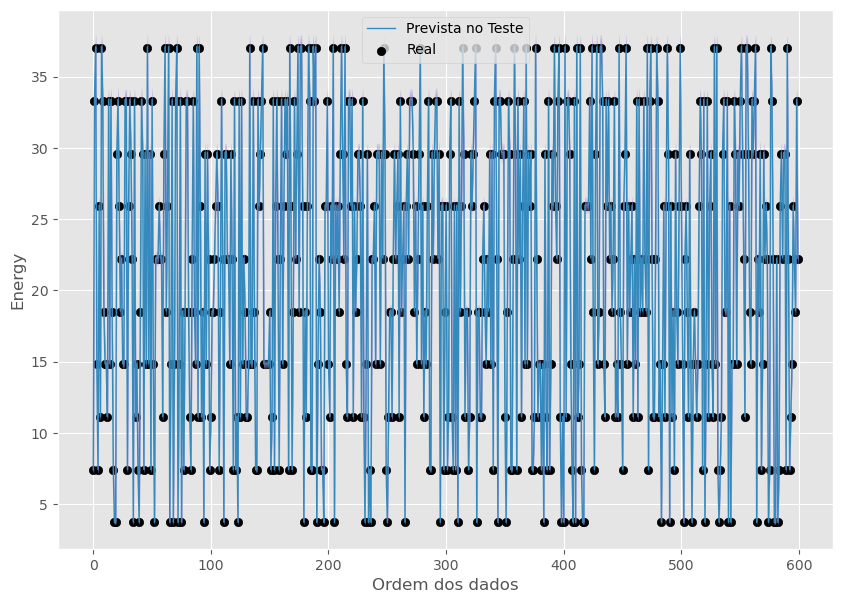

In [184]:
n = 600
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Energy")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [98]:
T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_train]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_train.shape[0]).T

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [99]:
l = 10
y_hat_train_mean = np.mean(y_hat_mc, axis=1)
y_hat_train_variance = np.var(y_hat_mc, axis=1)
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_train_variance += tau**-1

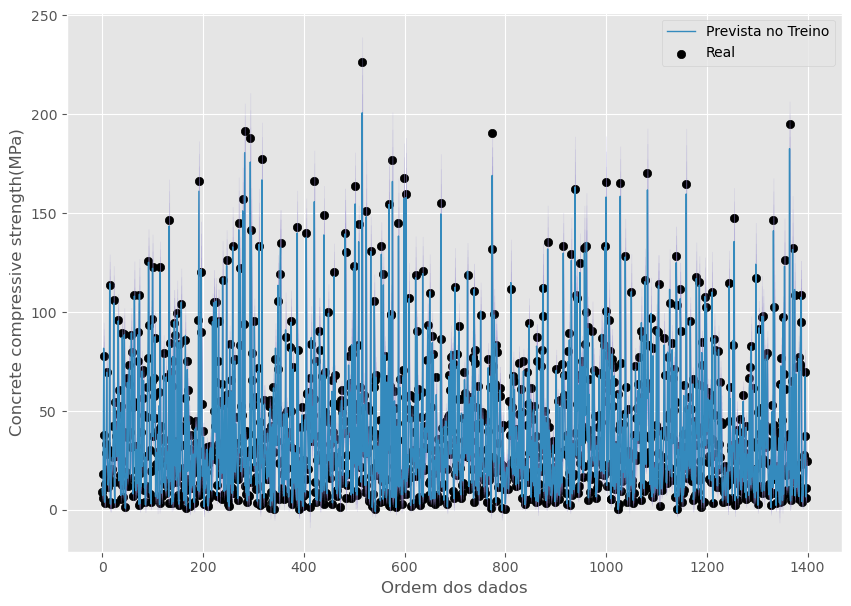

In [100]:
n = 1399
t = range(n) 
mu = y_hat_train_mean
sigma = np.sqrt(y_hat_train_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Treino", color="C1", lw=1)
plt.scatter(t, y_train, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2") # 90% IC

plt.ylabel("Concrete compressive strength(MPa)")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_train.png")
plt.show()